In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rc('font', family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
#학습데이터읽기
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [3]:
X = dataset.iloc[:,:-1].values #이차함배열, 일차함배열 데이터- X.reshape(len(X),1) 변경
y = dataset.iloc[:,-1].values #일차함배열
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
X_train.shape, X_test.shape

((16, 1), (4, 1))

In [6]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
#6시간 공부시 합격/불합격예측
logistic.predict([[6],[4]])

array([1, 0])

In [8]:
logistic.predict_proba([[6]]) #??

array([[0.141483, 0.858517]])

In [9]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [10]:
y_test

array([1, 0, 1, 0])

In [11]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [12]:
logistic.score(X_test, y_test) #3/4확률로예측

0.75

In [13]:
#로지스틱모델 생성 함수

def model_logistic():
    import pandas as pd
    dataset = pd.read_csv('data/LogisticRegressionData.csv')
    X=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    return logistic

In [14]:
model = model_logistic()
hour=3.5
model.predict([[hour]]) #합격여부
model.predict_proba([[hour]]) ##불합격확률/합격확률

array([[0.74822448, 0.25177552]])

In [15]:
def predict(hour):
    model = model_logistic()
    pred = model.predict([[hour]])
    pred_proba = model.predict_proba([[hour]])
    pass_proba = pred_proba[0][1]
    fail_proba = pred_proba[0][0]

    if pred[0]==0:
        result = '불합격'
    else:
        result = '합격'
    print(f'{hour}시간 공부시 {result}입니다.')
    print(f'합격:{pass_proba*100:.2f}%, 불합격:{fail_proba*100:.2f}%')

predict(4.2)


4.2시간 공부시 불합격입니다.
합격:43.06%, 불합격:56.94%


In [16]:
import numpy as np
max = np.ceil(np.max(X_train)) #올림
min = np.floor(np.min(X_train)) #버림
x_range = np.arange(min, max, 0.1)
x_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [17]:
#공식 대입하여 p값 구하기/ p = 1/(1+e^-y)  y=mx+b  
y = logistic.coef_*x_range +logistic.intercept_
P = 1/(1+np.exp(-y)) #2차함배열, 1차함으로 변경필요(그래프y값화)
cols=P.shape[1]
p = P.reshape(cols)
p.shape

(90,)

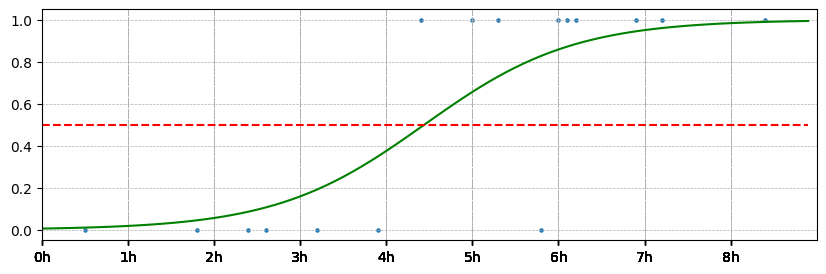

In [26]:
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train, s=5)
plt.plot(x_range, p, color='g')
plt.plot(x_range, np.full(len(x_range),0.5), color='r', ls='--')
plt.grid(True, ls='--',lw=0.5)
xticks = [int(x) for x in x_range]
plt.xticks(xticks, [f'{x}h' for x in xticks])
plt.xlim(0,max)
plt.show()

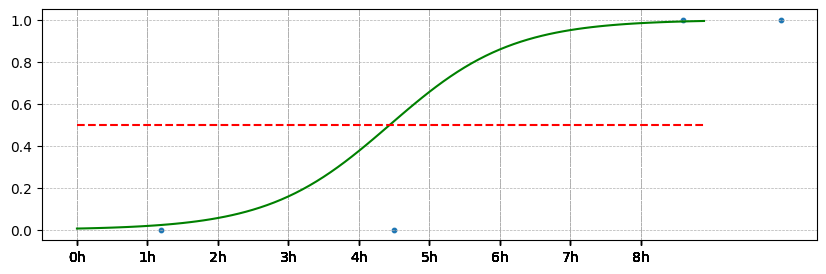

In [29]:
plt.figure(figsize=(10,3))
plt.scatter(X_test, y_test, s=10)
plt.plot(x_range, p, color='g')
plt.plot(x_range, np.full(len(x_range),0.5), color='r', ls='--')
plt.grid(True, ls='--',lw=0.5)
xticks = [int(x) for x in x_range]
plt.xticks(xticks, [f'{x}h' for x in xticks])
# plt.xlim(0,max)
plt.show()